# Initial Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
frames = [df_2015, df_2016]
df = pd.concat(frames)

In [3]:
print('Number of Features: ', len(df.columns))
print('Number of Observations: ', len(df))

Number of Features:  46
Number of Observations:  752559


In [4]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS', 'Unnamed: 45'],
      dtype='object')

In [5]:
# These features are redundant, so we are going to drop them
df = df.drop(['UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME', 'CARRIER',  'ORIGIN_STATE_ABR', 
             'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_WAC',
             'DEST_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 
              'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID'], axis=1)

In [6]:
# Create new features: passenger_miles, seat_miles, load_factor, per_per
df['passenger_miles'] = df['PASSENGERS'] * df['DISTANCE']
df['seat_miles'] = df['SEATS'] * df['DISTANCE']
df['load_factor'] = df['passenger_miles'] / df['seat_miles']
df['per_cap'] = df['PASSENGERS'] / df['SEATS']

In [7]:
# Drop Unnamed: 45
df = df.drop('Unnamed: 45', axis=1)

# Drop INF observations
df = df[df != np.inf]

In [8]:
# Also need to drop NaN values
df = df.dropna()

# We are interested in looking at passengers and load_factor, so lets drop all observations where there are no seats
# and there are no passengers
df = df[df.seat_miles !=0]
df = df[df.SEATS != 0]
df = df[df.PASSENGERS !=0]

In [9]:
df = df[df.CARRIER_GROUP_NEW == 3]

In [10]:
df.CARRIER_NAME.unique()

array(['Frontier Airlines Inc.', 'Southwest Airlines Co.',
       'Atlas Air Inc.', 'Alaska Airlines Inc.', 'Delta Air Lines Inc.',
       'Envoy Air', 'US Airways Inc.', 'Virgin America',
       'Hawaiian Airlines Inc.', 'United Air Lines Inc.',
       'JetBlue Airways', 'American Airlines Inc.',
       'SkyWest Airlines Inc.', 'ExpressJet Airlines Inc.',
       'Spirit Air Lines', 'Allegiant Air'], dtype=object)

In [11]:
len(df.CARRIER_NAME.unique())

16

In [12]:
# Lets look at how many rows and observations there are now
print('Number of Features: ', len(df.columns))
print('Number of Observations: ', len(df))

Number of Features:  33
Number of Observations:  378382


# Explore Continuous Variables

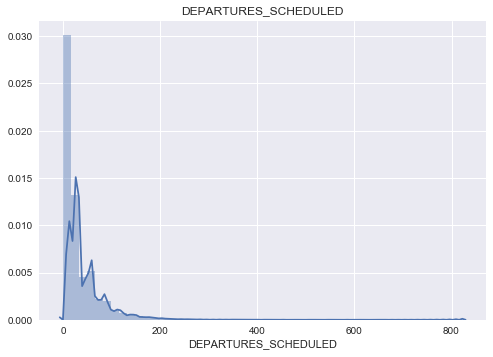

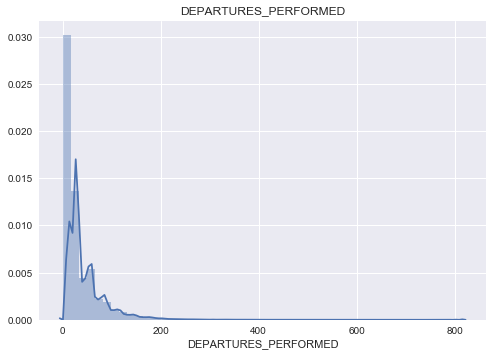

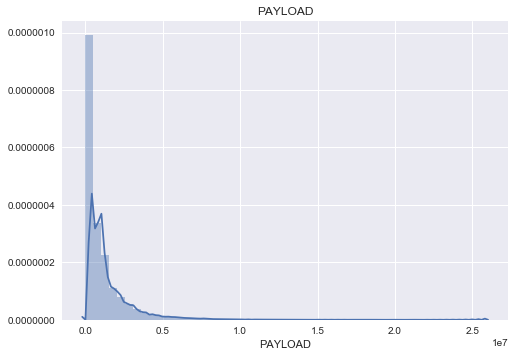

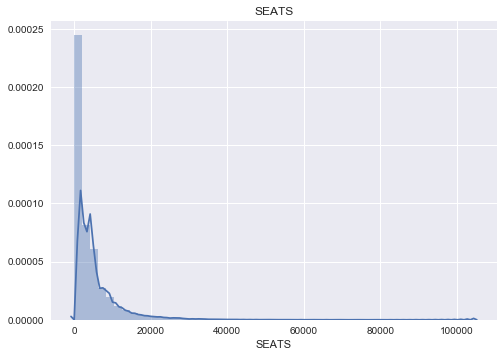

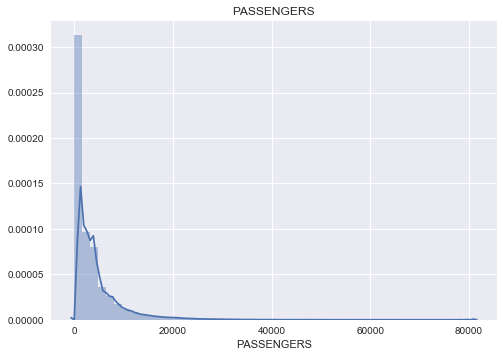

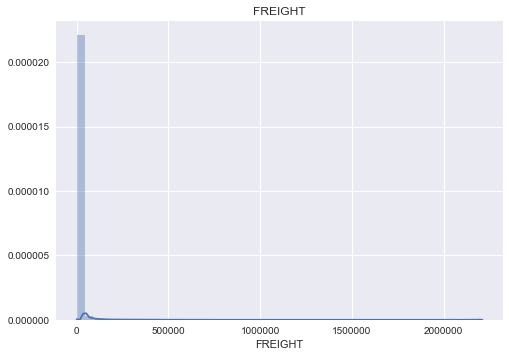

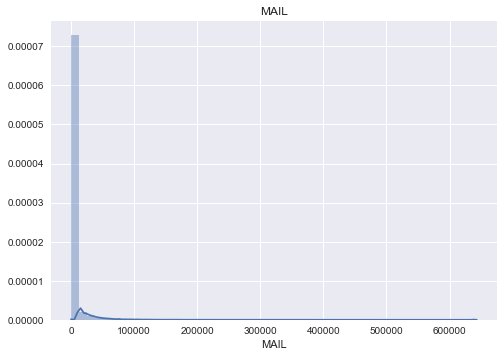

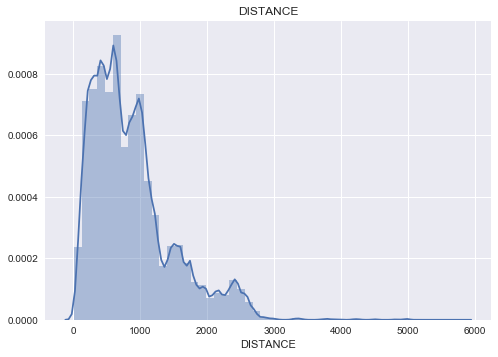

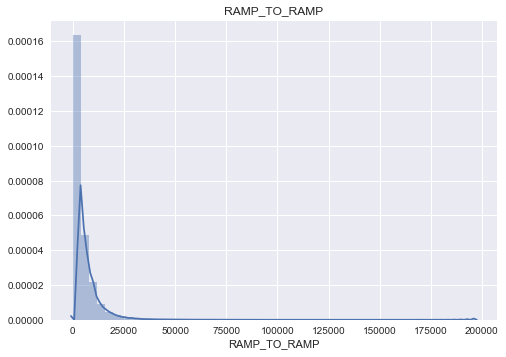

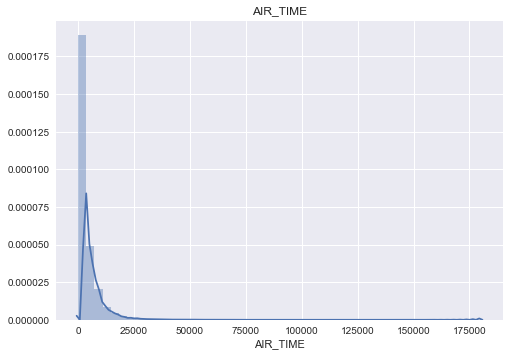

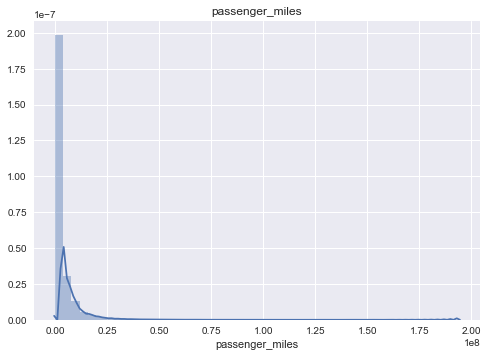

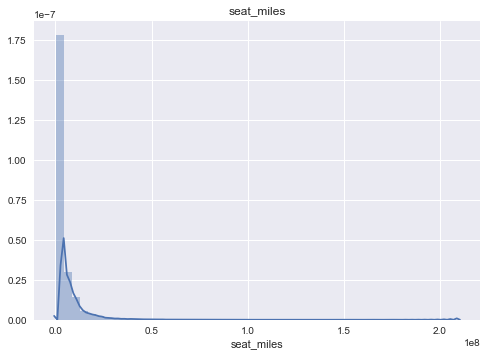

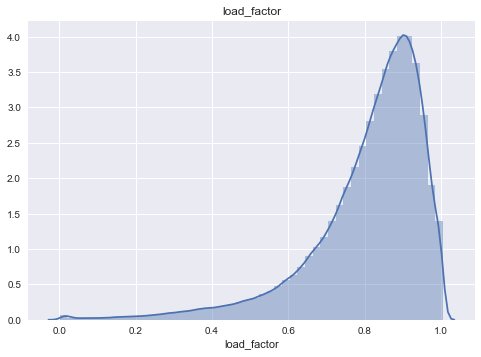

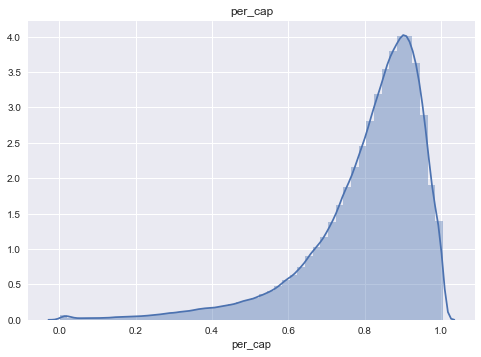

In [13]:
cont_var = ['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS', 'PASSENGERS', 
           'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME', 'passenger_miles', 'seat_miles',
           'load_factor', 'per_cap']

for each in cont_var:
    sns.distplot(df[each])
    plt.title(each)
    plt.show()

In [14]:
# Lets remove the obvious outliers for each of the features
df = df[df.PASSENGERS < 15000]
df = df[df.load_factor < 1.0000001]
df = df[df.DEPARTURES_SCHEDULED < 125]
df = df[df.DEPARTURES_PERFORMED < 125]
df= df[df.PAYLOAD < 4000000]
df = df[df.SEATS < 10000]
df = df[df.RAMP_TO_RAMP < 15000]
df = df[df.DISTANCE < 3000]

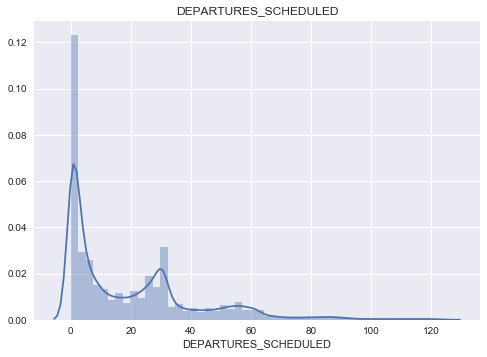

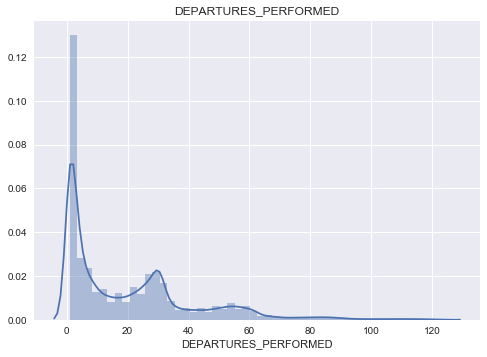

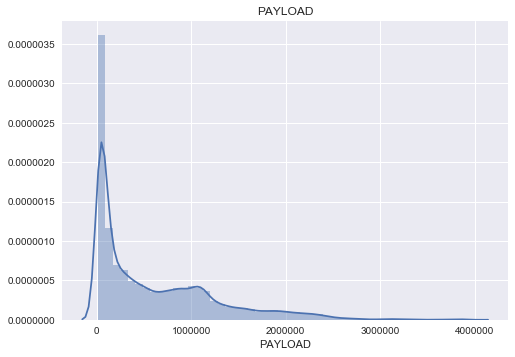

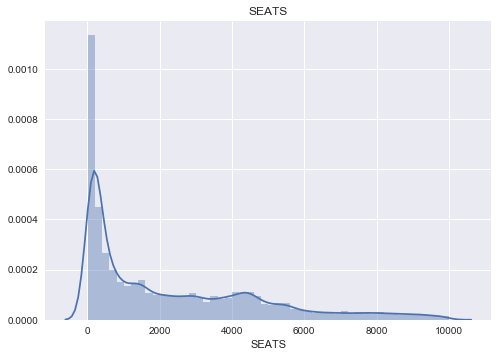

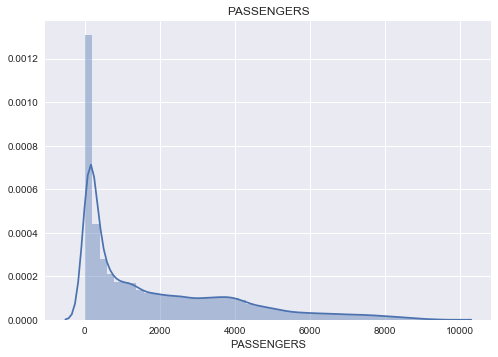

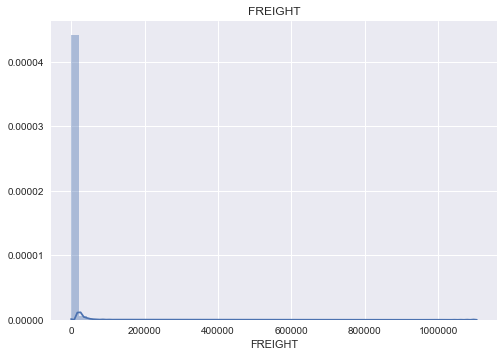

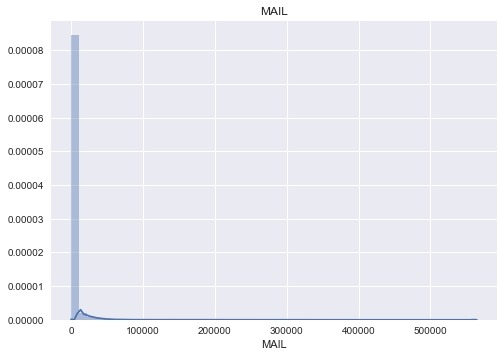

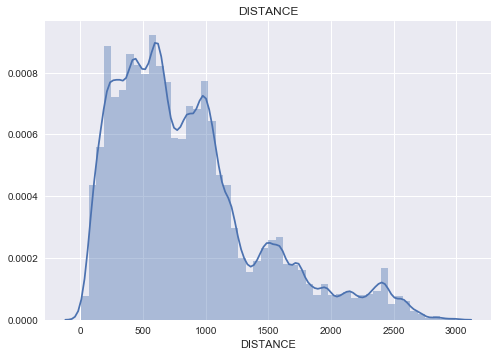

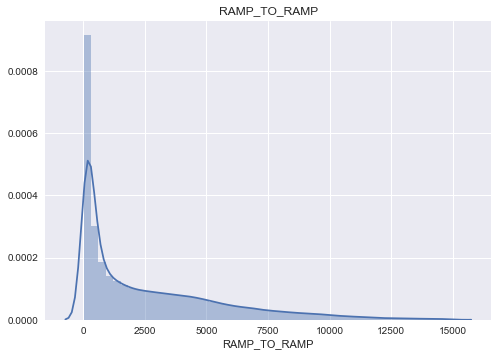

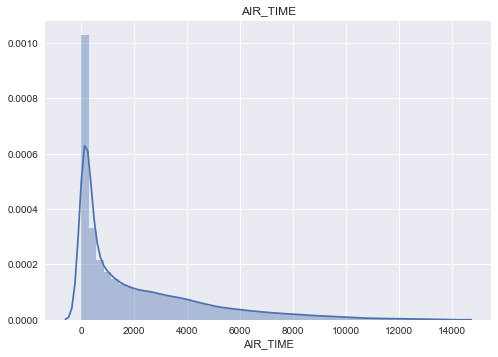

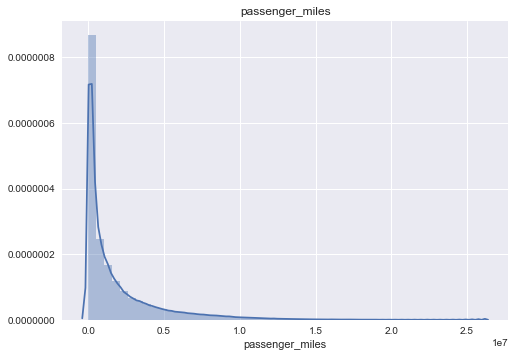

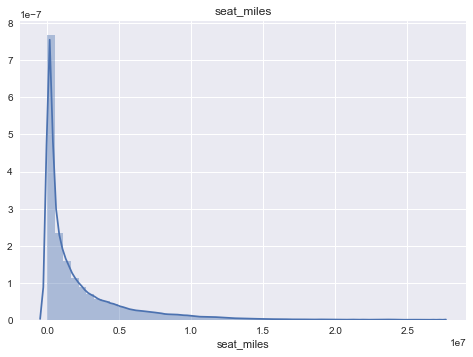

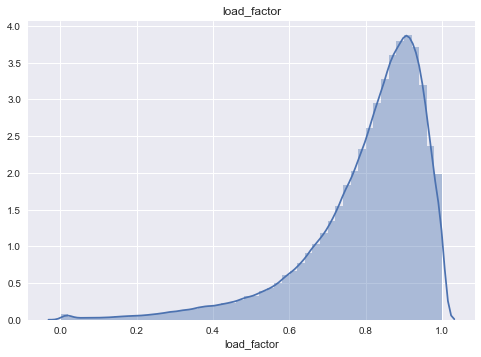

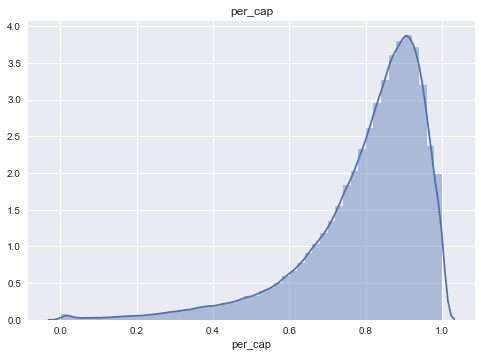

In [15]:
# Look at the distributions without the obvious outliers
for each in cont_var:
    sns.distplot(df[each])
    plt.title(each)
    plt.show()

In [16]:
df['load_factor'].describe()

count    334983.000000
mean          0.803852
std           0.158349
min           0.001538
25%           0.740392
50%           0.845417
75%           0.913922
max           1.000000
Name: load_factor, dtype: float64

In [17]:
bins = [0, 0.745833, 0.847672, 0.914601, 1.000000]
group_names = ['Low', 'Medium', 'High', 'Very High']

categories = pd.cut(df['load_factor'], bins, labels=group_names)
df['loadfactor_level'] = pd.cut(df['load_factor'], bins, labels=group_names)
df['loadfactor_binned'] = pd.cut(df['load_factor'], bins)

In [18]:
pd.value_counts(df['loadfactor_level'])

Low          86996
Medium       83032
Very High    82654
High         82301
Name: loadfactor_level, dtype: int64

In [19]:
lf_dum = pd.get_dummies(df['loadfactor_level'])
df = pd.concat([df, lf_dum], axis=1)
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,passenger_miles,seat_miles,load_factor,per_cap,loadfactor_level,loadfactor_binned,High,Low,Medium,Very High
1780,0.0,1.0,125000.0,180.0,87.0,0.0,0.0,2173.0,317.0,289.0,...,189051.0,391140.0,0.483333,0.483333,Low,"(0.0, 0.746]",0,1,0,0
1781,0.0,1.0,125000.0,180.0,121.0,0.0,0.0,2173.0,266.0,249.0,...,262933.0,391140.0,0.672222,0.672222,Low,"(0.0, 0.746]",0,1,0,0
1858,0.0,1.0,32200.0,137.0,130.0,74.0,0.0,619.0,121.0,107.0,...,80470.0,84803.0,0.948905,0.948905,Very High,"(0.915, 1.0]",0,0,0,1
1859,0.0,1.0,43400.0,175.0,171.0,281.0,0.0,349.0,65.0,52.0,...,59679.0,61075.0,0.977143,0.977143,Very High,"(0.915, 1.0]",0,0,0,1
1860,0.0,1.0,34600.0,143.0,84.0,4.0,0.0,332.0,57.0,45.0,...,27888.0,47476.0,0.587413,0.587413,Low,"(0.0, 0.746]",0,1,0,0


In [20]:
# Lets look at how many rows and observations there are now
print('Number of Features: ', len(df.columns))
print('Number of Observations: ', len(df))

Number of Features:  39
Number of Observations:  334983


# Explore Categorical Variables

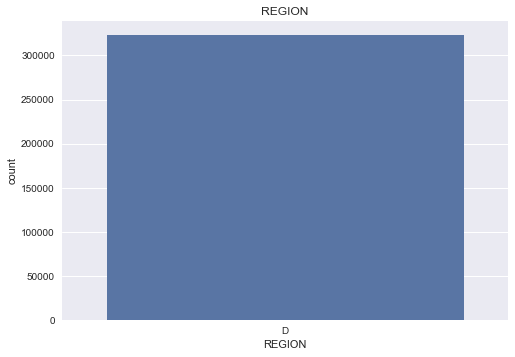

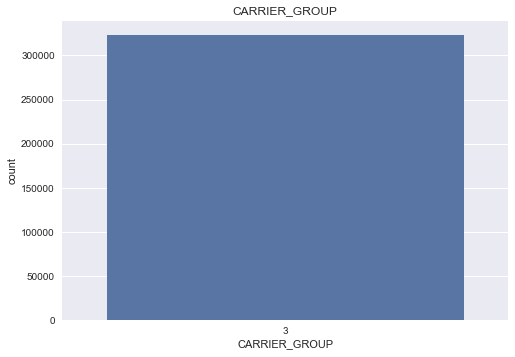

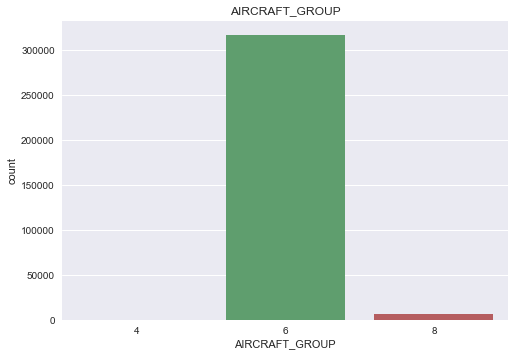

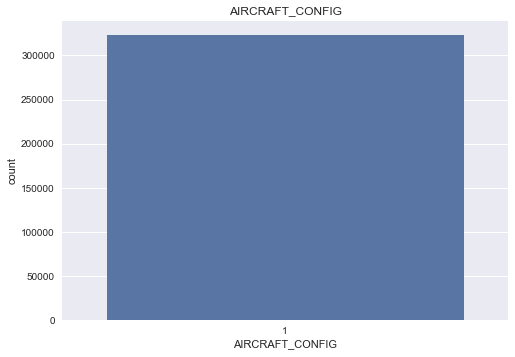

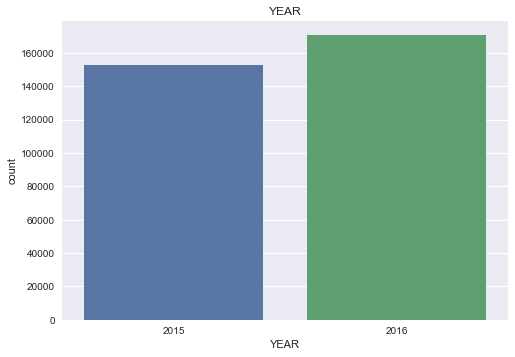

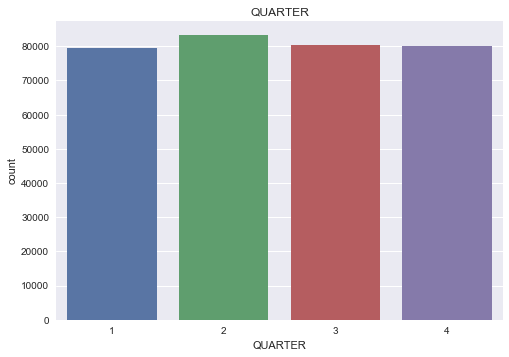

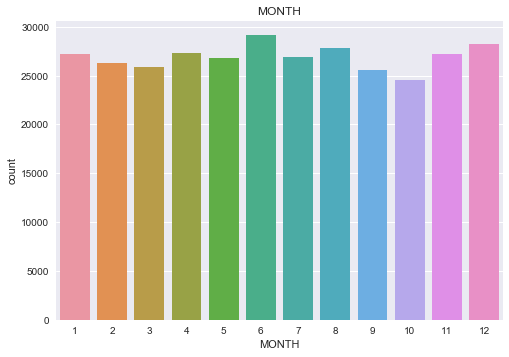

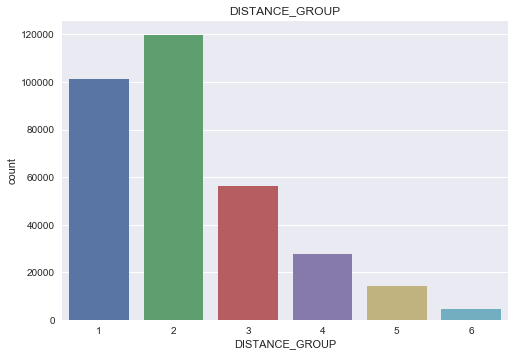

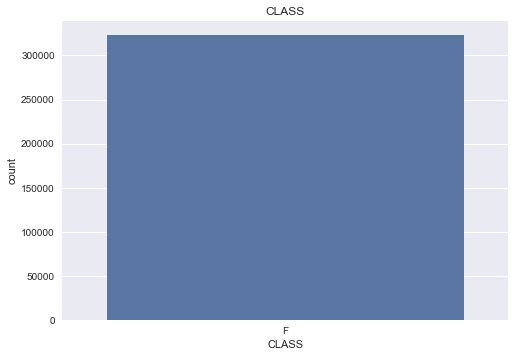

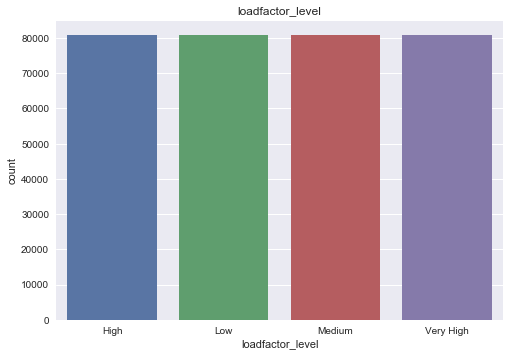

In [26]:
# These are categorical variables with a smaller number of classes, making them appropriate for countplots
sm_cat_var = ['REGION', 'CARRIER_GROUP', 'AIRCRAFT_GROUP', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS', 'loadfactor_level']

for each in sm_cat_var:
    sns.countplot(x = each, data = df)
    plt.title(each)
    plt.show()

In [22]:
# We are only interested in the domestic flights for the purposes of this project
df = df[df.REGION == 'D']

# Even though we are examining continuou variables in this notebook, I am going to drop all cargo/non-passenger
# observations by 'CLASS' and see how that effects the distributions of load_factor and per_cap. 
df = df[df.CLASS != 'G']
df = df[df.CLASS != 'P']
df = df[df.CLASS != 'L']

# I am also going to remove all non-passenger or mixed use aircraft configurations so that only passenger
# configurations remain
df = df[df.CLASS != '2']
df = df[df.CLASS != '3']
df = df[df.CLASS != '4']

# For the purposes of this project, we are only interested in planes that were meant to carry passengers.
df = df[df.AIRCRAFT_CONFIG == 1]

In [23]:
# Lets look at how many rows and observations there are now
print('Number of Features: ', len(df.columns))
print('Number of Observations: ', len(df))

Number of Features:  39
Number of Observations:  323187


# Now Lets Explore Some of the Bivariate Relationships in the Dataset

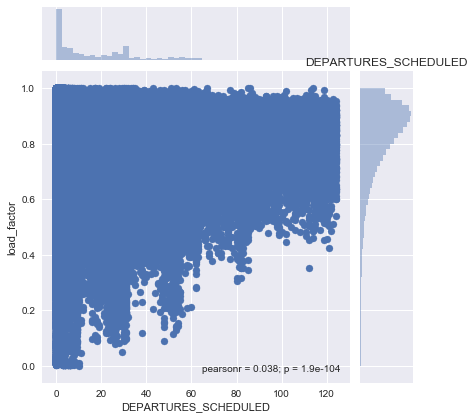

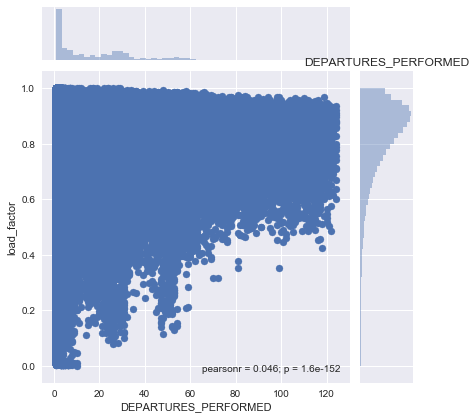

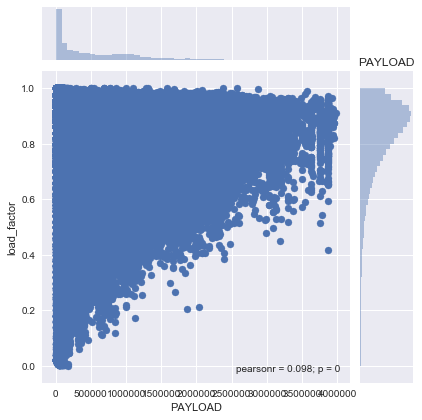

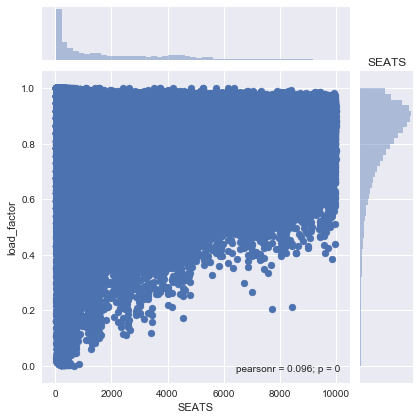

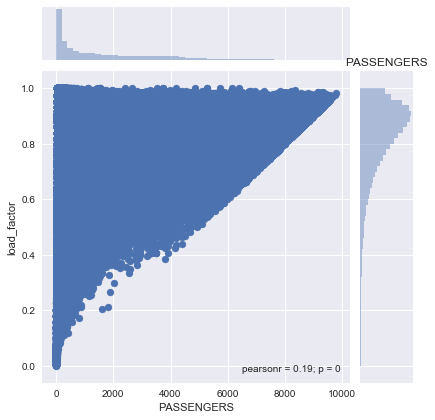

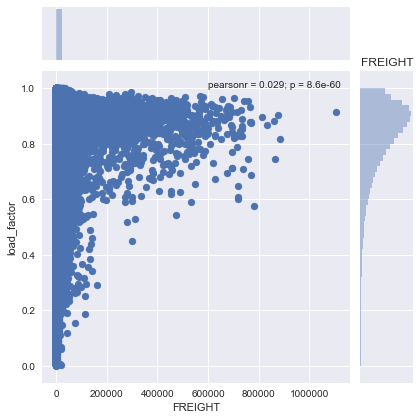

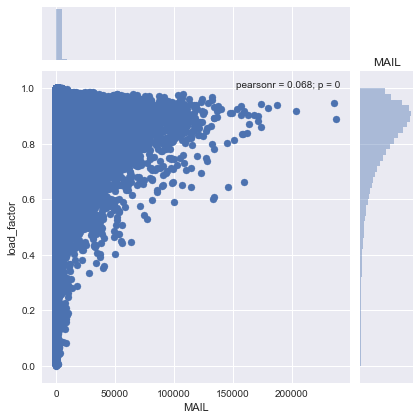

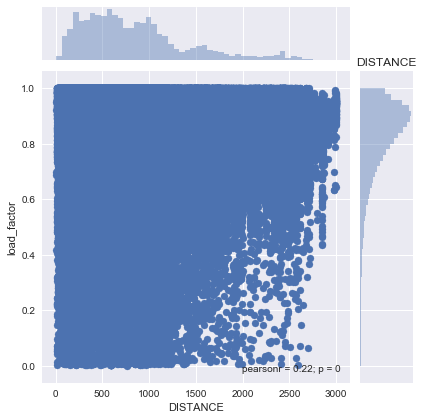

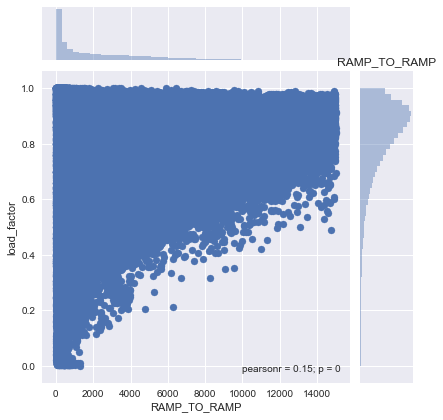

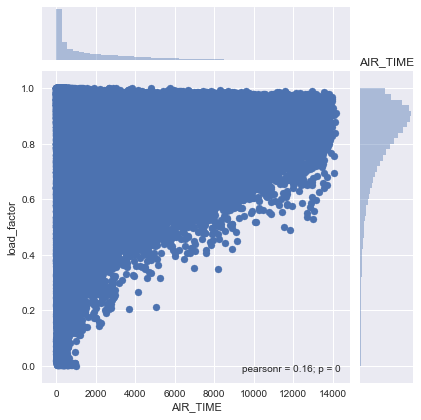

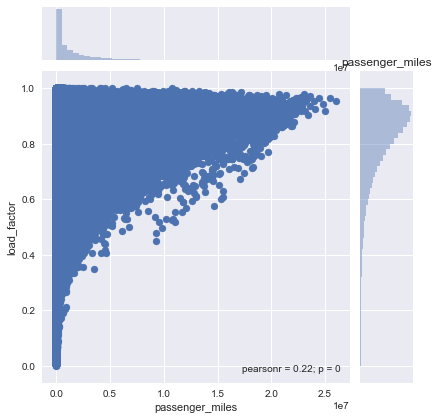

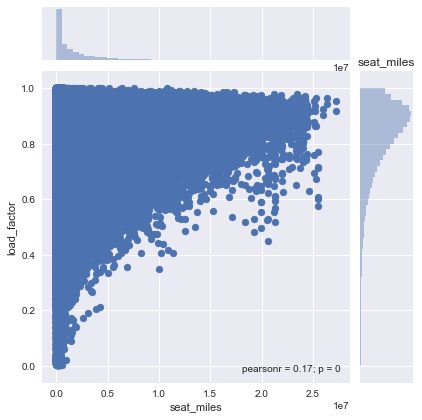

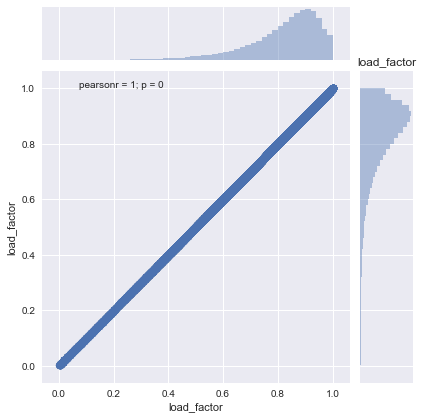

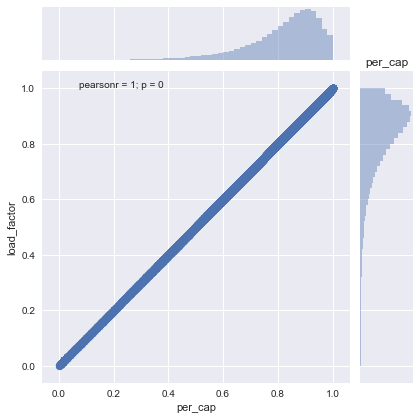

In [24]:
# Lets look at the relationship between the continuous variables and load_factor--my preferred target variable
for each in cont_var:
    sns.jointplot(x=each, y = 'load_factor', data = df)
    plt.title(each)
    plt.show()

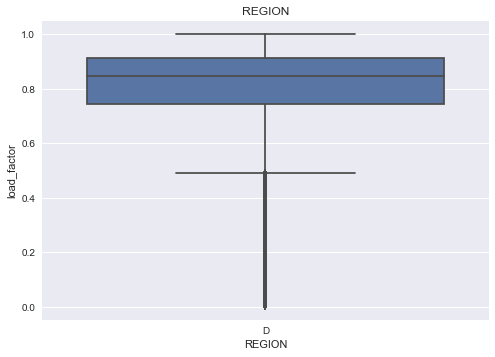

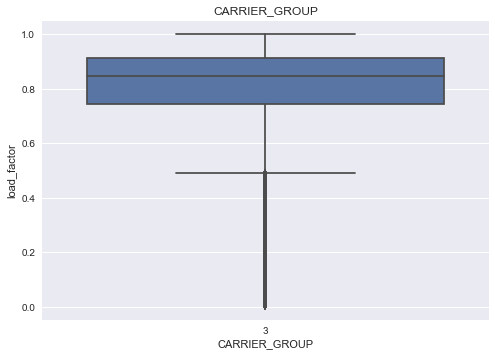

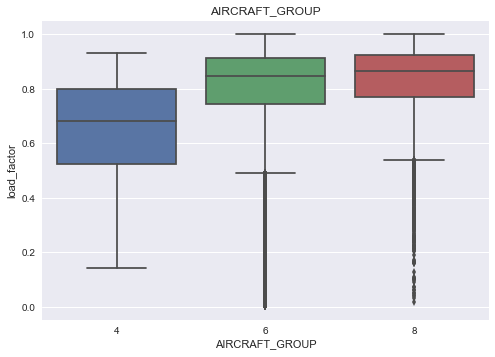

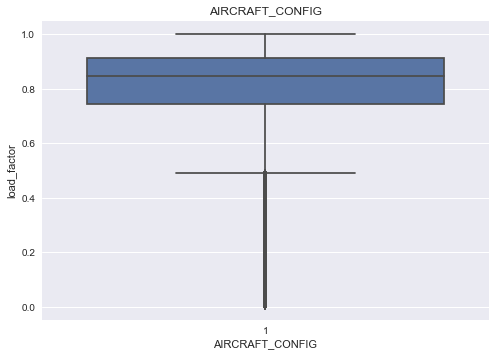

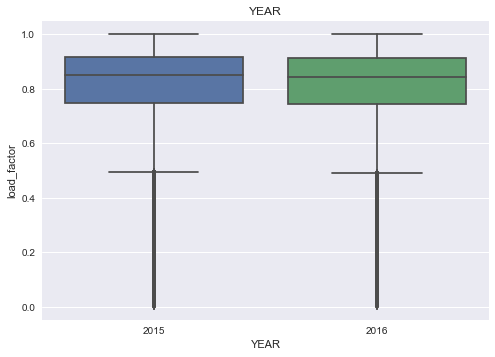

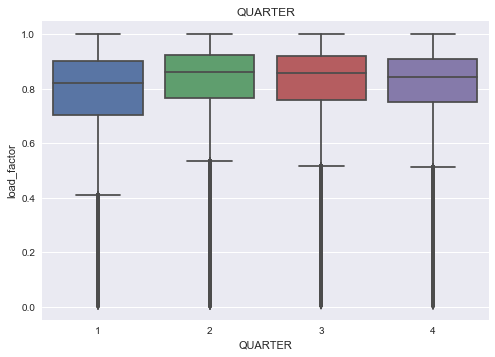

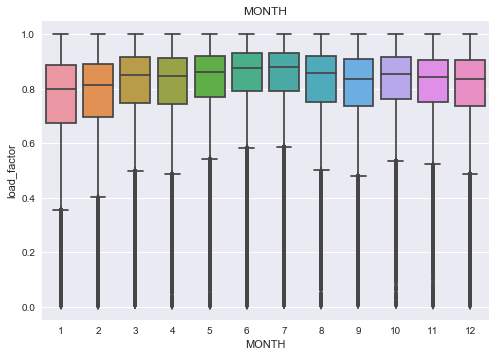

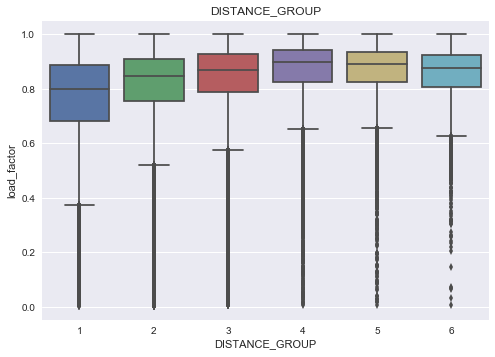

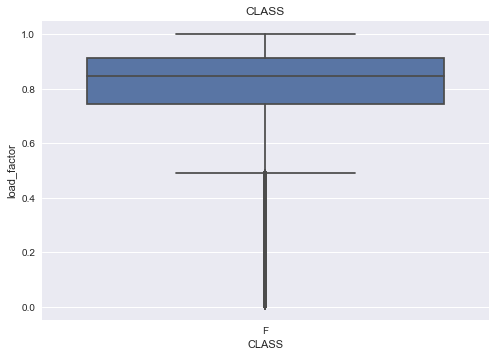

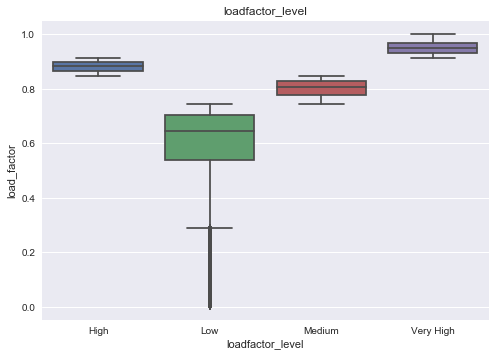

In [27]:
# Now lets look at the relationship between the categorical variables with fewer classes and load_factor
for each in sm_cat_var:
    sns.boxplot(each, 'load_factor', data=df)
    plt.title(each)
    plt.show()